## Introduction

Notebook ini digunakan untuk melakukan clustering terhadap preferensi pelanggan AirBnB

## Import Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.cm as cm
from sklearn.model_selection import GridSearchCV

## Data Loading

In [2]:
df = pd.read_csv('listings_cleaned_new.csv')

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923 entries, 0 to 28922
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    28923 non-null  int64  
 1   listing_url           28923 non-null  object 
 2   picture_url           28923 non-null  object 
 3   name                  28923 non-null  object 
 4   description           28923 non-null  object 
 5   property_type         28923 non-null  object 
 6   room_type             28923 non-null  object 
 7   accommodates          28923 non-null  int64  
 8   number_of_reviews     28923 non-null  int64  
 9   bedrooms              28923 non-null  float64
 10  beds                  28923 non-null  float64
 11  price                 28923 non-null  float64
 12  review_scores_rating  28923 non-null  float64
 13  city                  28923 non-null  object 
 14  latitude              28923 non-null  float64
 15  longitude          

In [4]:
df.head().T

0  \
id                                                             52438122   
listing_url                       https://www.airbnb.com/rooms/52438122   
picture_url           https://a0.muscache.com/pictures/miso/Hosting-...   
name                  Stunning New Cottage minutes to downtown Ashev...   
description           Come relax in this brand new cottage with tast...   
property_type                                            Entire cottage   
room_type                                               Entire home/apt   
accommodates                                                          4   
number_of_reviews                                                    63   
bedrooms                                                            2.0   
beds                                                                2.0   
price                                                             225.0   
review_scores_rating                                               4.98   
city                                                          Asheville   
latitude                                                       35.56967   
longitude                                                     -82.63193   
bathrooms                                                           1.5   

                                                                      1  \
id                                                             22119778   
listing_url                       https://www.airbnb.com/rooms/22119778   
picture_url           https://a0.muscache.com/pictures/bac6ce5d-d2ff...   
name                  Large king suite with private balcony and soak...   
description           Whether you're looking for a romantic Ashevill...   
property_type                         Private room in bed and breakfast   
room_type                                                  Private room   
accommodates                                                          3   
number_of_reviews                                                     1   
bedrooms                                                            2.0   
beds                                                                2.0   
price                                                             306.0   
review_scores_rating                                                5.0   
city                                                          Asheville   
latitude                                                       35.60284   
longitude                                                     -82.56727   
bathrooms                                                           1.0   

                                                                      2  \
id                                                             47812966   
listing_url                       https://www.airbnb.com/rooms/47812966   
picture_url           https://a0.muscache.com/pictures/324713f3-ea1c...   
name                    Blue Ridge Magic: Artist's Hideaway (Brand New)   
description           New listing: Blue Ridge Magic named for our pa...   
property_type                                        Entire rental unit   
room_type                                               Entire home/apt   
accommodates                                                          4   
number_of_reviews                                                    25   
bedrooms                                                            1.0   
beds                                                                2.0   
price                                                             108.0   
review_scores_rating                                                5.0   
city                                                          Asheville   
latitude                                                       35.58475   
longitude                                                     -82.57182   
bathrooms                                                           1.0   

                 

In [5]:
df.tail().T

28918  \
id                                                             27775041   
listing_url                       https://www.airbnb.com/rooms/27775041   
picture_url           https://a0.muscache.com/pictures/a843d538-6891...   
name                        All Bunked Up! New bathroom & washer/dryer!   
description           This is unbelievably DC! Oldest house in Chevy...   
property_type                                      Private room in home   
room_type                                                  Private room   
accommodates                                                          3   
number_of_reviews                                                   112   
bedrooms                                                            1.0   
beds                                                                3.0   
price                                                              49.0   
review_scores_rating                                               4.91   
city                                                      Washington DC   
latitude                                                       38.96679   
longitude                                                     -77.07738   
bathrooms                                                           1.0   

                                                                  28919  \
id                                                             15248451   
listing_url                       https://www.airbnb.com/rooms/15248451   
picture_url           https://a0.muscache.com/pictures/6c3a8c0f-121b...   
name                      2BR/1BA Capitol Hill Apt (Potomac Ave Metro)!   
description           We are back after renting to renovating neighb...   
property_type                                        Entire rental unit   
room_type                                               Entire home/apt   
accommodates                                                          4   
number_of_reviews                                                    42   
bedrooms                                                            2.0   
beds                                                                2.0   
price                                                             112.0   
review_scores_rating                                                5.0   
city                                                      Washington DC   
latitude                                                       38.88408   
longitude                                                     -76.98483   
bathrooms                                                           1.0   

                                                                  28920  \
id                                                             17248804   
listing_url                       https://www.airbnb.com/rooms/17248804   
picture_url           https://a0.muscache.com/pictures/bdcf71be-560a...   
name                          203【Private Room - Queen bed in CoHi DC!】   
description           Looking to explore DC and live comfortably on ...   
property_type                                 Private room in townhouse   
room_type                                                  Private room   
accommodates                                                          2   
number_of_reviews                                                    97   
bedrooms                                                            1.0   
beds                                                                1.0   
price                                                             141.0   
review_scores_rating                                               4.37   
city                                                      Washington DC   
latitude                                                       38.92742   
longitude                                                     -77.02941   
bathrooms                                                           2.0   

             

In [6]:
df.describe()

id  accommodates  number_of_reviews      bedrooms  \
count  2.892300e+04  28923.000000       28923.000000  28923.000000   
mean   2.070613e+17      4.494555          49.294230      1.844829   
std    3.190306e+17      2.943806          82.490302      1.170654   
min    2.441000e+03      1.000000           1.000000      1.000000   
25%    2.337826e+07      2.000000           4.000000      1.000000   
50%    4.590081e+07      4.000000          17.000000      1.000000   
75%    5.963108e+17      6.000000          57.000000      2.000000   
max    8.858475e+17     16.000000        1156.000000     16.000000   

               beds          price  review_scores_rating      latitude  \
count  28923.000000   28923.000000          28923.000000  28923.000000   
mean       2.504443     257.783218              4.739328     34.741879   
std        1.942310    1241.013458              0.512432      6.869691   
min        1.000000       0.000000              0.000000     18.930100   
25%        1.000000      97.000000              4.700000     30.330565   
50%        2.000000     157.000000              4.880000     36.012250   
75%        3.000000     270.000000              5.000000     40.679930   
max       36.000000  100000.000000              5.000000     47.734010   

          longitude     bathrooms  
count  28923.000000  28923.000000  
mean    -104.547331      1.543875  
std       25.594478      0.888702  
min     -159.714280      0.000000  
25%     -118.465140      1.000000  
50%      -97.937540      1.000000  
75%      -80.141420      2.000000  
max      -71.078370     12.000000

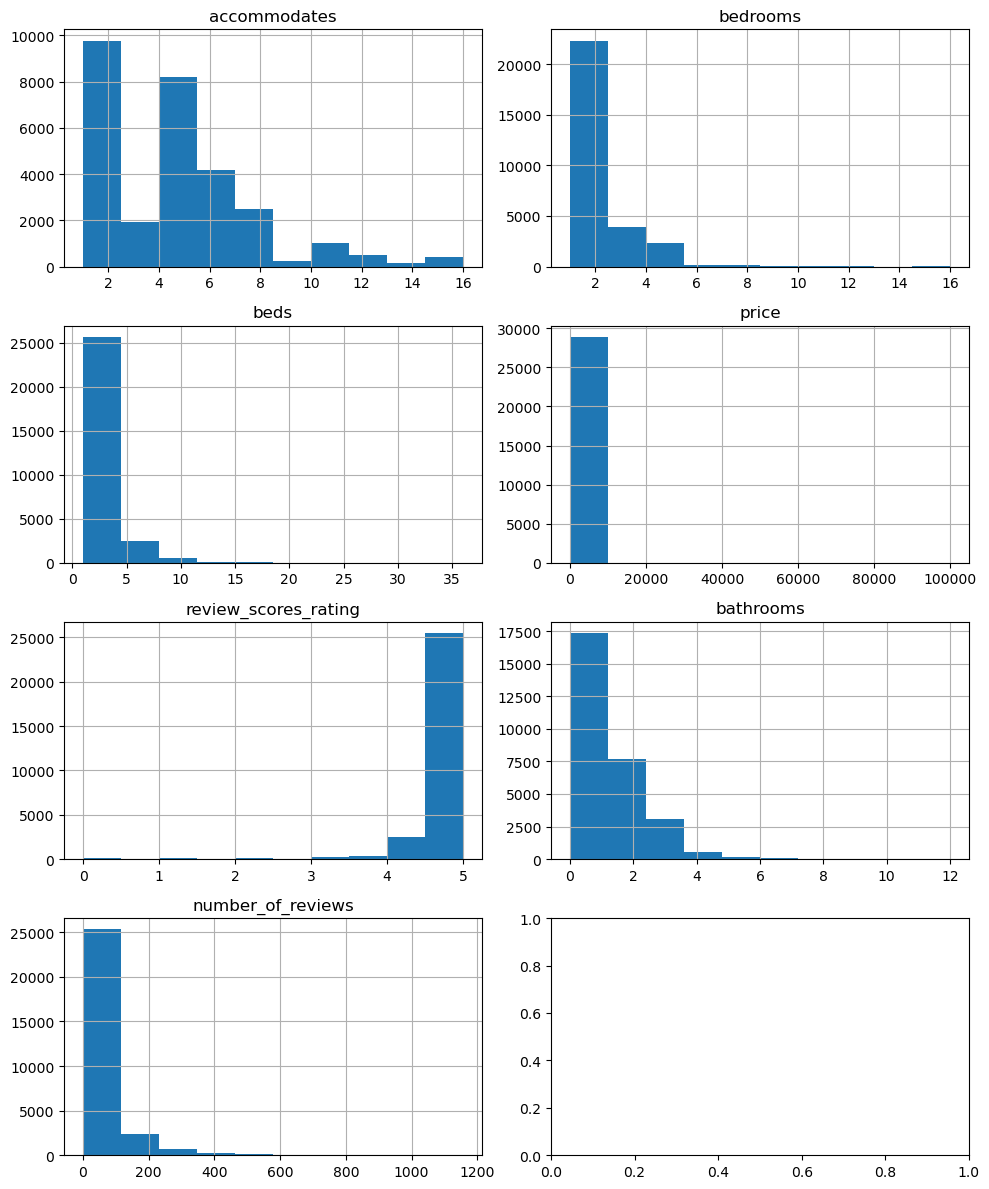

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(10, 12))

bills = df[['accommodates','bedrooms','beds','price','review_scores_rating','bathrooms','number_of_reviews']]

for ax, column in zip(axs.flatten(), bills):
    df[column].hist(ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [8]:
df.nunique()

id                      28923
listing_url             28923
picture_url             28767
name                    28567
description             28184
property_type              97
room_type                   4
accommodates               16
number_of_reviews         571
bedrooms                   13
beds                       25
price                    1272
review_scores_rating      160
city                       31
latitude                27200
longitude               27093
bathrooms                  22
dtype: int64

<Axes: xlabel='city'>

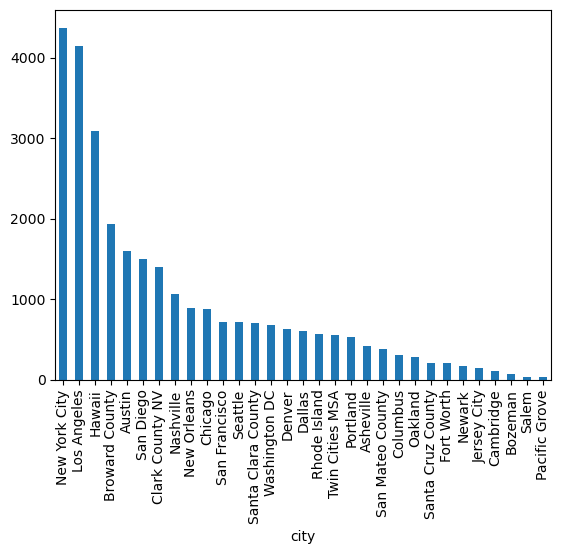

In [9]:
df['city'].value_counts().plot(kind='bar')

<Axes: xlabel='room_type'>

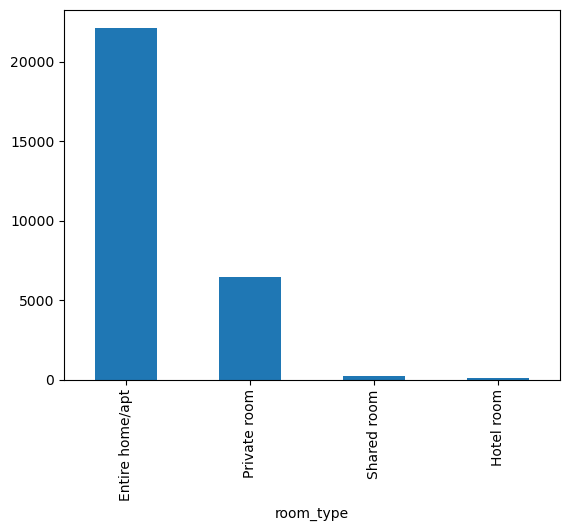

In [10]:
df['room_type'].value_counts().plot(kind='bar')

## Feature Engineering

In [11]:
df.columns

Index(['id', 'listing_url', 'picture_url', 'name', 'description',
       'property_type', 'room_type', 'accommodates', 'number_of_reviews',
       'bedrooms', 'beds', 'price', 'review_scores_rating', 'city', 'latitude',
       'longitude', 'bathrooms'],
      dtype='object')

In [12]:
df.isna().sum()

id                      0
listing_url             0
picture_url             0
name                    0
description             0
property_type           0
room_type               0
accommodates            0
number_of_reviews       0
bedrooms                0
beds                    0
price                   0
review_scores_rating    0
city                    0
latitude                0
longitude               0
bathrooms               0
dtype: int64

Data yang digunakan tidak memiliki missing value pada tiap kolomnya.

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

id                      28923
listing_url             28923
picture_url             28767
name                    28567
description             28184
property_type              97
room_type                   4
accommodates               16
number_of_reviews         571
bedrooms                   13
beds                       25
price                    1272
review_scores_rating      160
city                       31
latitude                27200
longitude               27093
bathrooms                  22
dtype: int64

In [15]:
X = df.drop(['id','listing_url','picture_url','name','description','property_type'], axis=1)

In [16]:
# Memisahkan features categorical dengan features numerical
num_X = X.select_dtypes(exclude=['object'])
cat_X = X.select_dtypes(include=['object'])

In [17]:
num_X.skew()

accommodates             1.455956
number_of_reviews        3.721630
bedrooms                 1.928705
beds                     2.889305
price                   60.358077
review_scores_rating    -5.695724
latitude                -0.558386
longitude               -0.536014
bathrooms                2.801051
dtype: float64

In [18]:
# Mengambil nama kolom feature categorical dan numerical
num_col = num_X.columns.to_list()
cat_col = cat_X.columns.to_list()

In [19]:
# Melihat skewness data
skewness = num_X[num_col].skew()

norm_col = []
skew_col = []

for column in skewness.index:
    if abs(skewness[column]) > 0.5:
        skew_col.append(column)
    else:
        norm_col.append(column)


In [20]:
# Preprocessor digunakan untuk pipeline

# Pipeline untuk processing data numeric dengan distribusi skewed
skew_pipeline = Pipeline([
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=3, variables=skew_col)),
    ('scaler', RobustScaler())
    ]
)

# ColumnTransformer menggabungkan features yang telah diprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('skew', skew_pipeline, skew_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ]
)



pipeline = Pipeline([
    ('preprocessor',preprocessor)
    ])

In [21]:
X_scaled = pipeline.fit_transform(X)

In [22]:
# Specify the number of components
n_components = 42

# Melakukan PCA untuk mengurangi jumlah feature yang digunakan untuk unsupervised learning
svd = TruncatedSVD(n_components=n_components)
svd.fit(X_scaled)

TruncatedSVD(n_components=42)

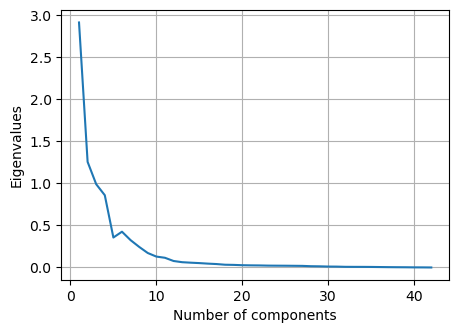

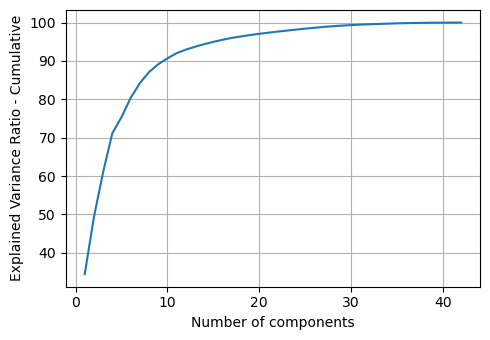

In [23]:
# Membuat grafik terkait dengan PCA untuk menentukan jumlah feature yang akan digunakan untuk pemodelan

# Grafik Eigenvalues
plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, len(svd.explained_variance_) + 1), svd.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.show()

# Grafik Explained Variance Ratio
plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, len(svd.explained_variance_ratio_) + 1), np.cumsum(svd.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cumulative')
plt.tight_layout()
plt.show()

In [24]:
# Melakukan pengecekan terhadap jumlah feauture yang dibutuhkan untuk mendapatkan 95% informasi data awal
cumsum = np.cumsum(svd.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

16

In [25]:
# Melakukan training dat menggunakan jumlah feature dengan 95% informasi data awal

svd_final = TruncatedSVD(n_components=num_features)
svd_final.fit(X_scaled)

X_scaled_svd = svd_final.transform(X_scaled)

## Model Definition

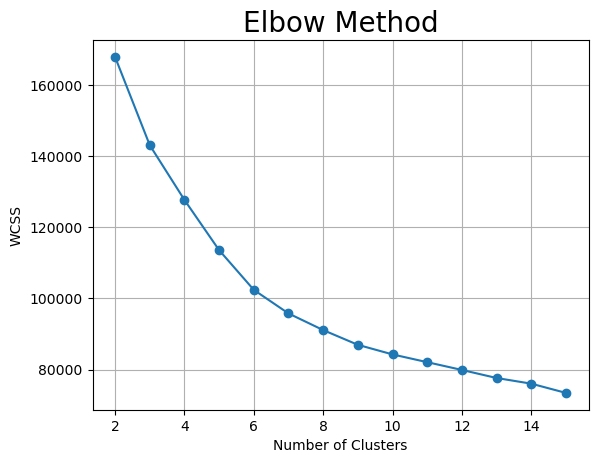

In [26]:
# Membuat grafik Elbow Method untuk menentukan jumlah cluster pada pemodelan
wcss = []
max_cluster = 15
random_state = 69
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 69)
    km.fit(X_scaled_svd)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Mendefinisikan fungsi untuk menampilkan grafik silhouette score dan persebaran data

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # Membuat grafik sihlouette score pada ax1
        ax1.set_xlim([-1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Membuat clustering data dengan random state sesuai yang ditenukan sebelumnya
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # Menampilkan hasil sihlouette score tiap cluster
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Melakukan perhitungan sihlouette score
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Menampilkan sihlouette score tiap cluster dan mengurutkan data tersebut
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Melakukan pelabelan pada tiap cluster
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Melakukan perhitungan untuk y berikutnya
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Menampilkan garis merah yang menunjukkan average silhouette score
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Membuat grafik plotting cluster pada ax2
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Memberi label tiap cluster
        centers = clusterer.cluster_centers_

        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3009099556868197
For n_clusters = 3 The average silhouette_score is : 0.2483613270957477
For n_clusters = 4 The average silhouette_score is : 0.20613282022063492
For n_clusters = 5 The average silhouette_score is : 0.21982805681188486
For n_clusters = 6 The average silhouette_score is : 0.23782026275060855
For n_clusters = 7 The average silhouette_score is : 0.19903479929189644
For n_clusters = 8 The average silhouette_score is : 0.20319128157596952
For n_clusters = 9 The average silhouette_score is : 0.1914640894385845
For n_clusters = 10 The average silhouette_score is : 0.1826442326803907
For n_clusters = 11 The average silhouette_score is : 0.18536648821795593
For n_clusters = 12 The average silhouette_score is : 0.172002337761387
For n_clusters = 13 The average silhouette_score is : 0.1748690060346425
For n_clusters = 14 The average silhouette_score is : 0.16352368198210018


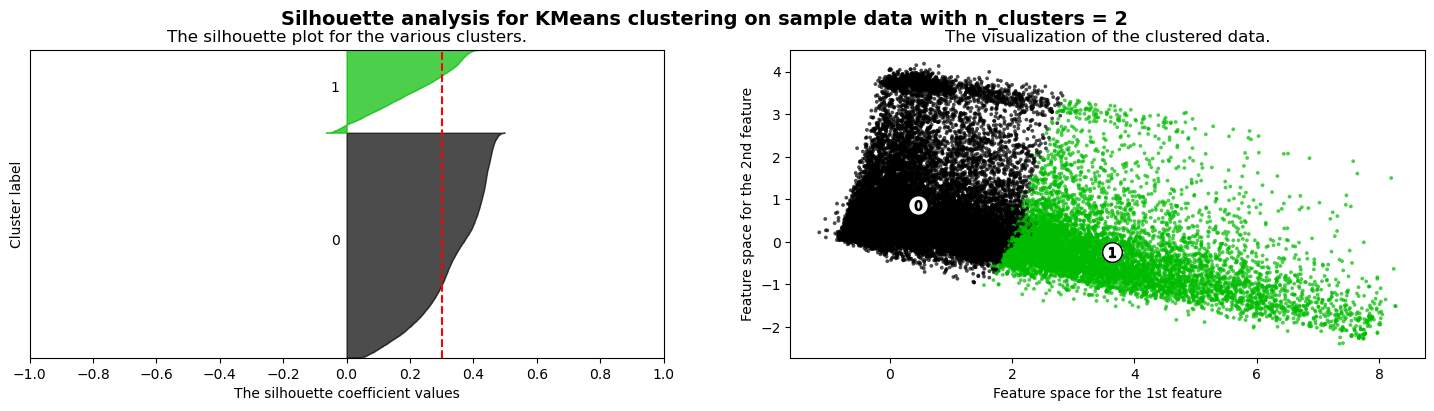

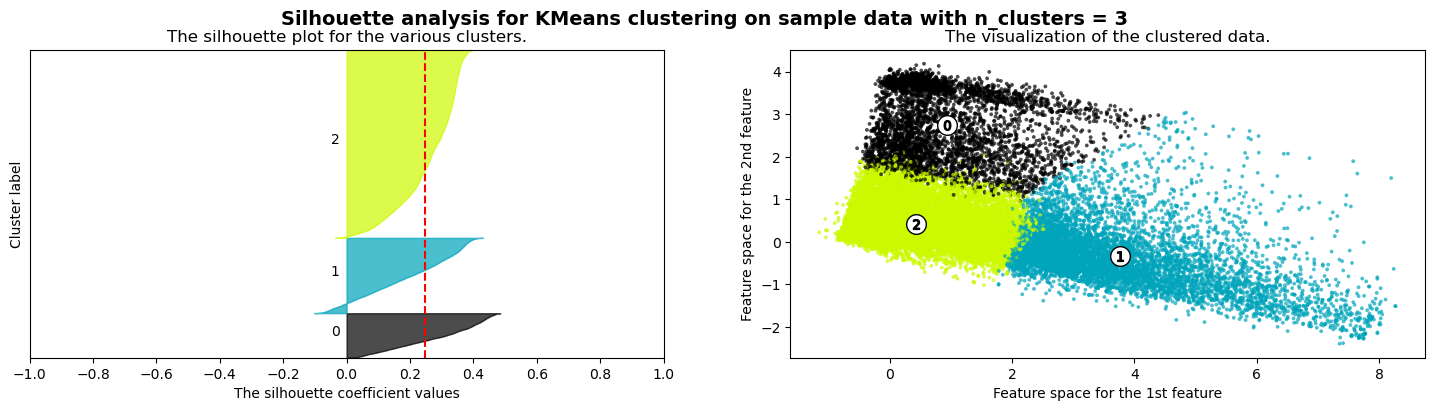

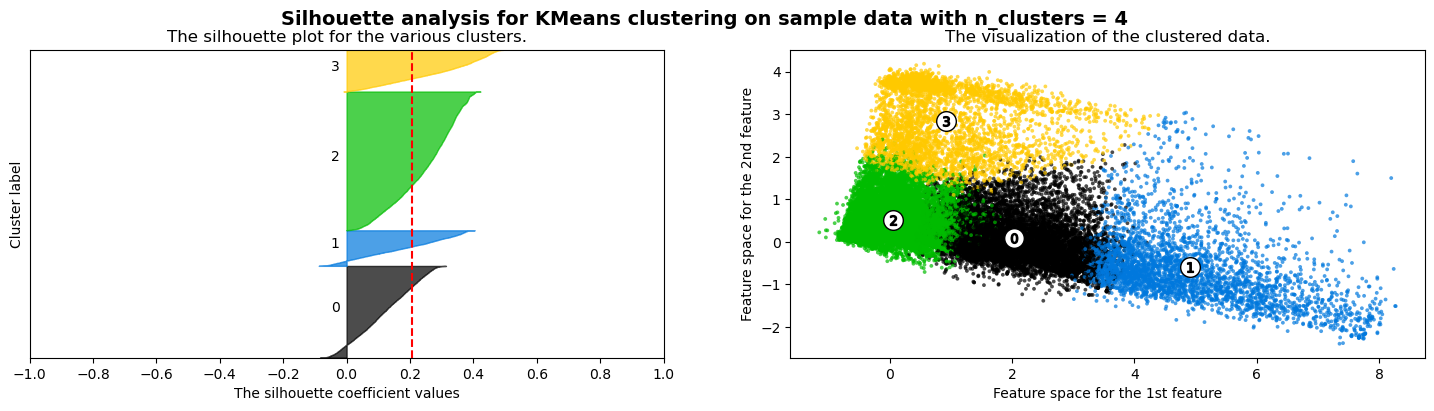

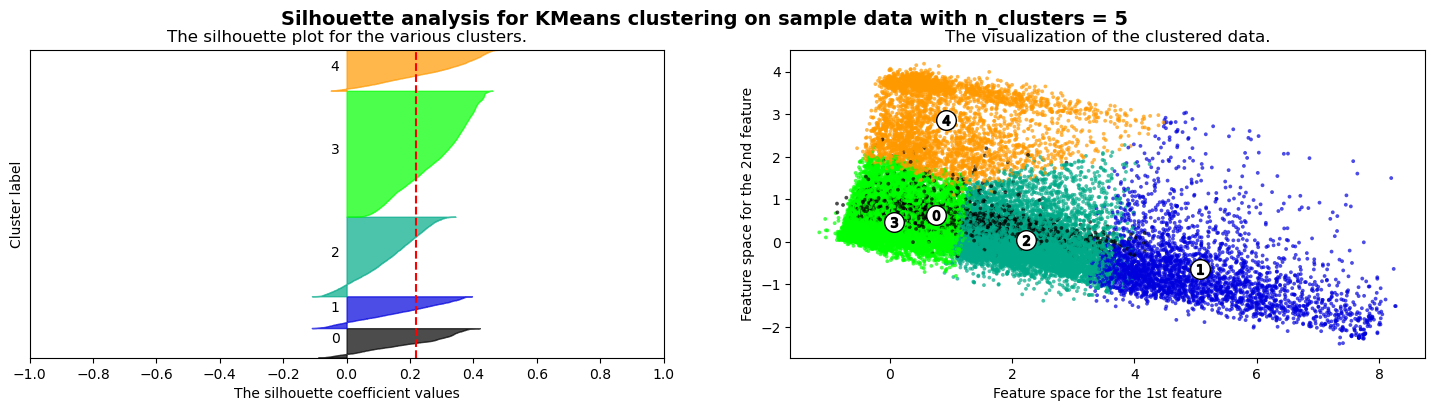

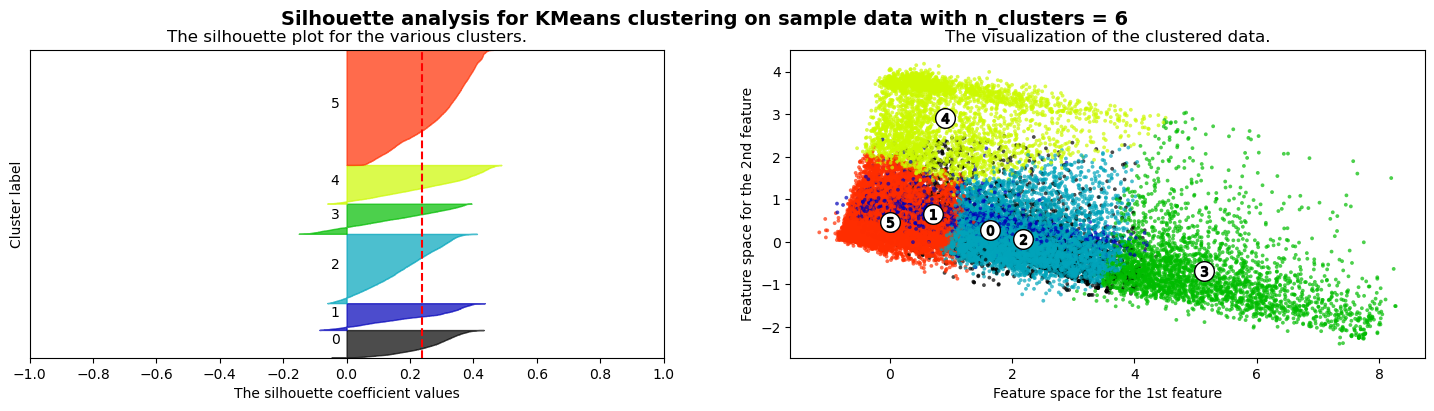

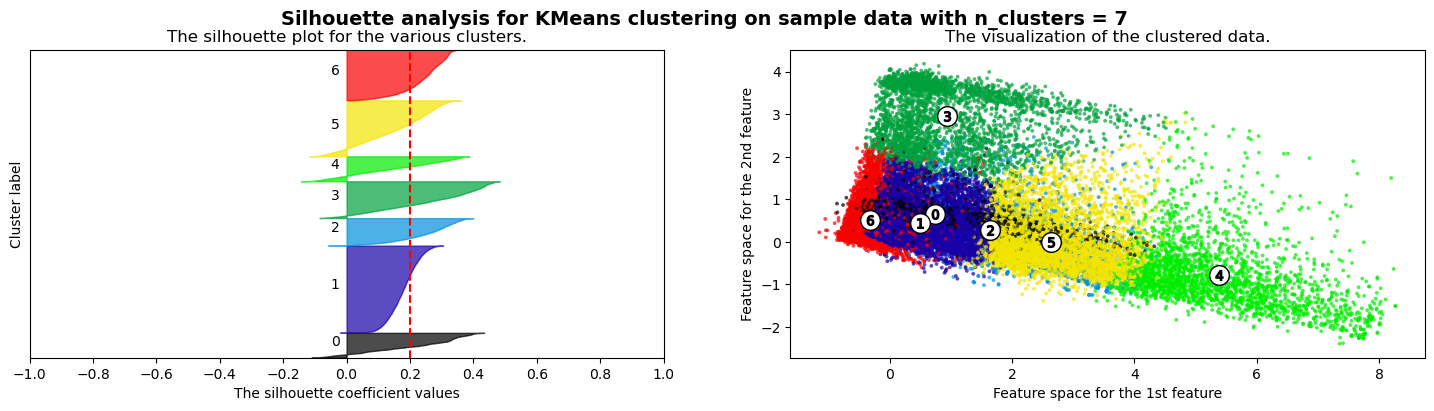

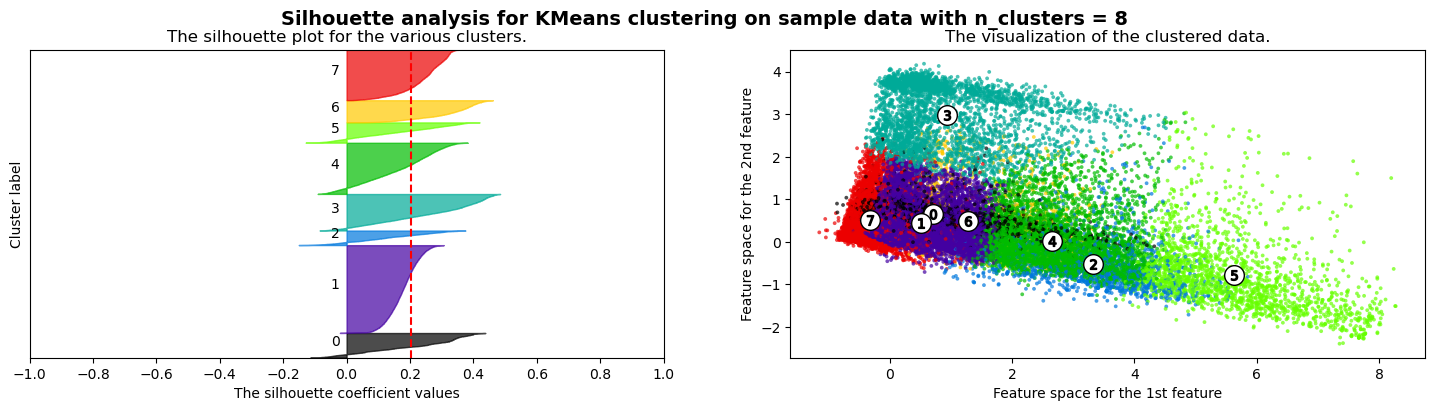

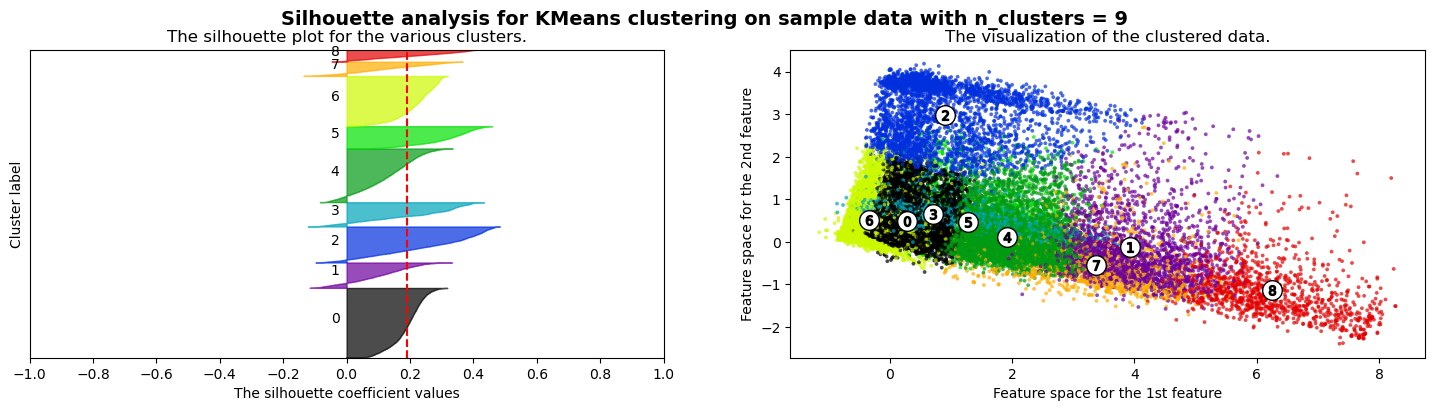

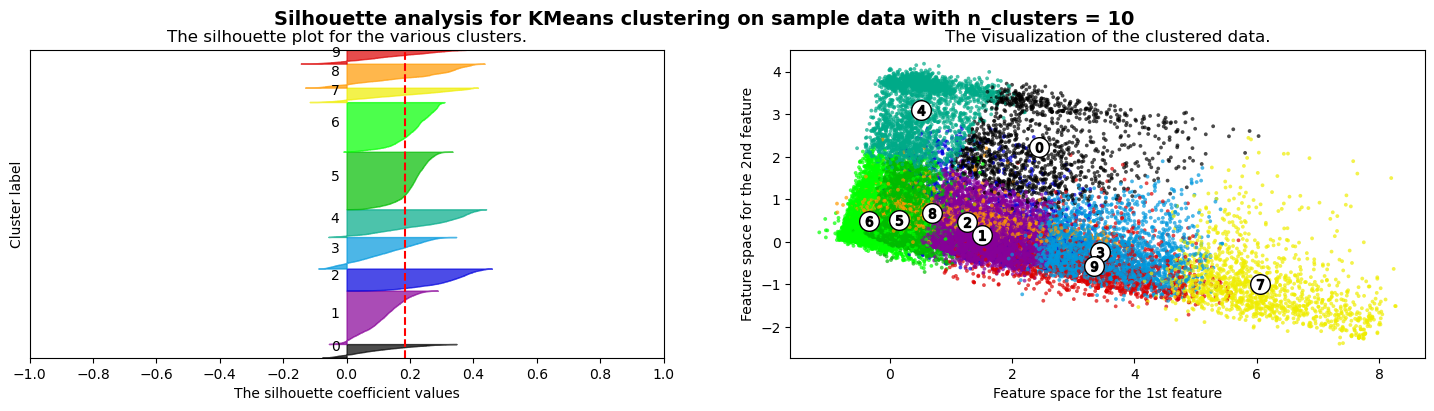

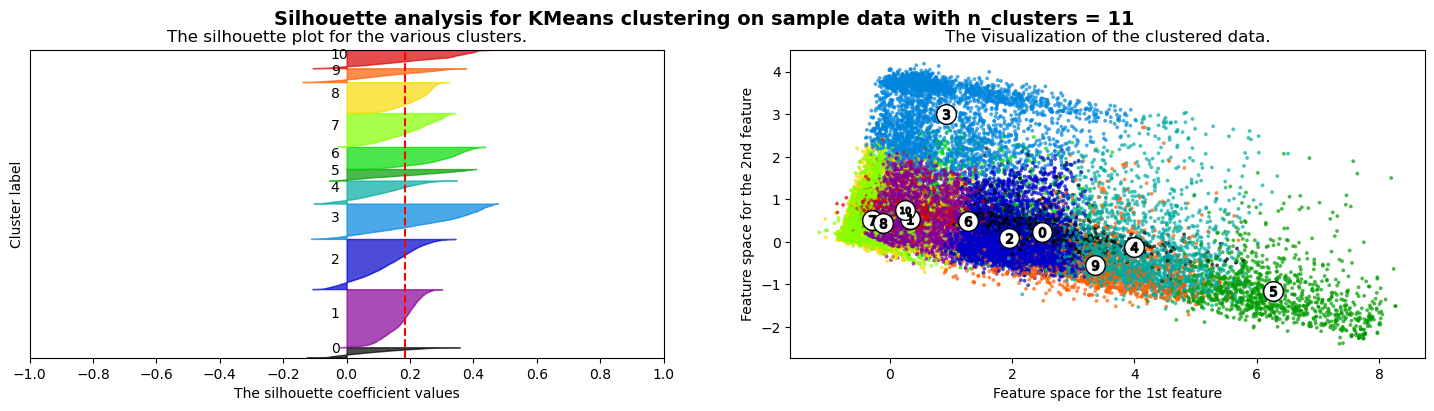

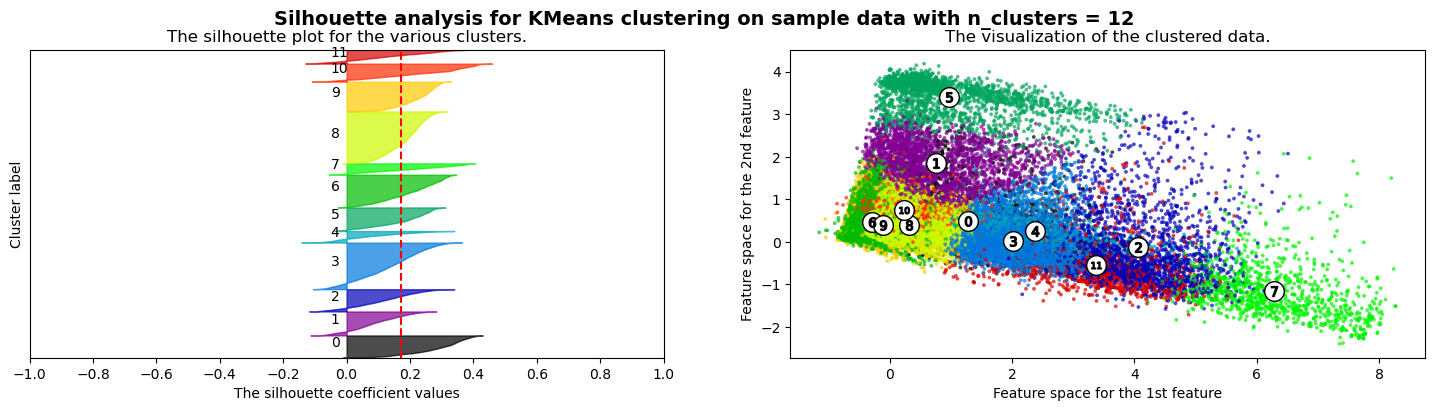

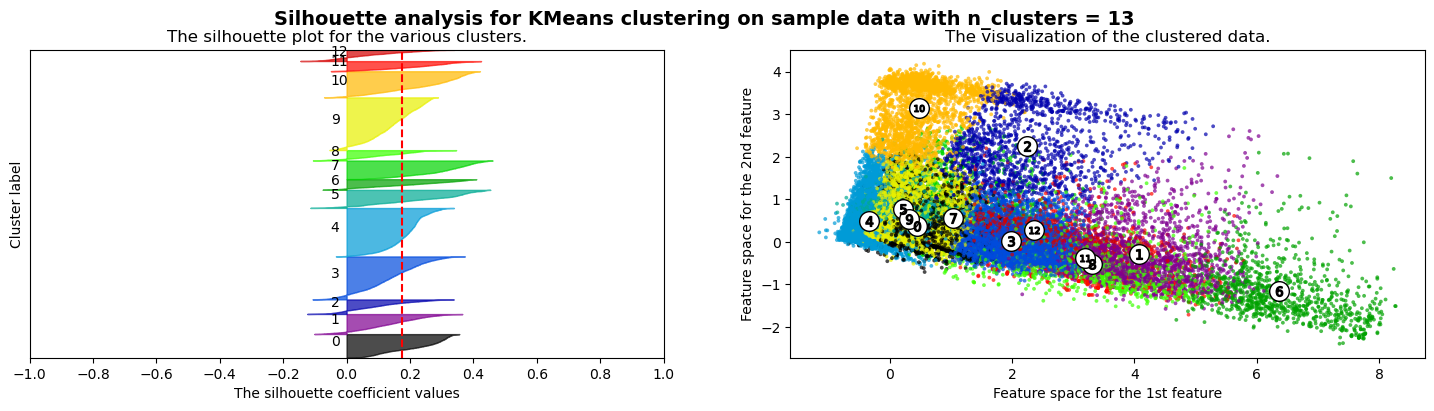

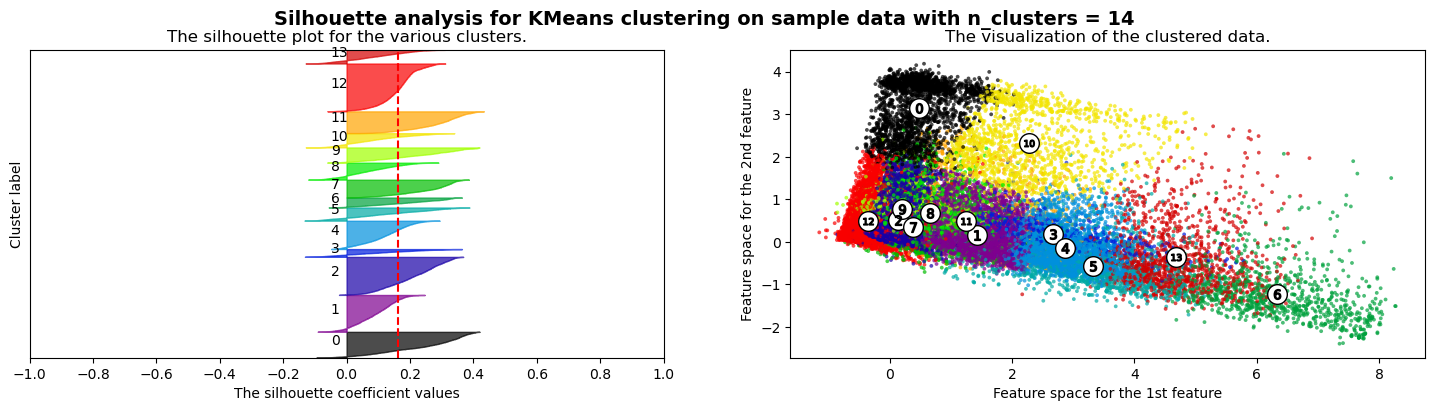

In [28]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), X_scaled_svd, random_state)

Digunakan n=2 untuk clustering karena memiliki sihlouette score tertinggi diantara cluster lainnya.

In [29]:
final_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('svd', TruncatedSVD(n_components=num_features)),
    ('kmeans', KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state))
    ])

In [30]:
# Save model menggunakan pickle
filename = 'finalized_model.pkl'
pickle.dump(final_pipeline, open(filename, 'wb'))

In [31]:
# Fit and predict the clusters
pred = final_pipeline.fit_predict(X)


In [32]:
# Menambahkan hasil pemodelan ke dataset awal
df['cluster'] = pred
df

id                            listing_url  \
0      52438122  https://www.airbnb.com/rooms/52438122   
1      22119778  https://www.airbnb.com/rooms/22119778   
2      47812966  https://www.airbnb.com/rooms/47812966   
3      46284932  https://www.airbnb.com/rooms/46284932   
4      48366092  https://www.airbnb.com/rooms/48366092   
...         ...                                    ...   
28918  27775041  https://www.airbnb.com/rooms/27775041   
28919  15248451  https://www.airbnb.com/rooms/15248451   
28920  17248804  https://www.airbnb.com/rooms/17248804   
28921  30775571  https://www.airbnb.com/rooms/30775571   
28922  35253515  https://www.airbnb.com/rooms/35253515   

                                             picture_url  \
0      https://a0.muscache.com/pictures/miso/Hosting-...   
1      https://a0.muscache.com/pictures/bac6ce5d-d2ff...   
2      https://a0.muscache.com/pictures/324713f3-ea1c...   
3      https://a0.muscache.com/pictures/miso/Hosting-...   
4      https://a0.muscache.com/pictures/prohost-api/H...   
...                                                  ...   
28918  https://a0.muscache.com/pictures/a843d538-6891...   
28919  https://a0.muscache.com/pictures/6c3a8c0f-121b...   
28920  https://a0.muscache.com/pictures/bdcf71be-560a...   
28921  https://a0.muscache.com/pictures/ade48059-2136...   
28922  https://a0.muscache.com/pictures/ec713e31-3bd5...   

                                                    name  \
0      Stunning New Cottage minutes to downtown Ashev...   
1      Large king suite with private balcony and soak...   
2        Blue Ridge Magic: Artist's Hideaway (Brand New)   
3                Simple and Cozy Bedroom in Central Area   
4       Hot tub, Fire pit, 5 miles to downtown Asheville   
...                                                  ...   
28918        All Bunked Up! New bathroom & washer/dryer!   
28919      2BR/1BA Capitol Hill Apt (Potomac Ave Metro)!   
28920          203【Private Room - Queen bed in CoHi DC!】   
28921  Ultra Chic & Modern Garden Condo by Union Station   
28922      Fantastic 2BR in DC, Furnished + Pet-Friendly   

                                             description  \
0      Come relax in this brand new cottage with tast...   
1      Whether you're looking for a romantic Ashevill...   
2      New listing: Blue Ridge Magic named for our pa...   
3      Looking for a simple bedroom and bathroom to r...   
4      Beautiful 2 bedroom oasis. Custom built, fully...   
...                                                  ...   
28918  This is unbelievably DC! Oldest house in Chevy...   
28919  We are back after renting to renovating neighb...   
28920  Looking to explore DC and live comfortably on ...   
28921  Located in Judiciary Square with spectacular v...   
28922  This charming two-bedroom gem in The Colonel i...   

                           property_type        room_type  accommodates  \
0                         Entire cottage  Entire home/apt             4   
1      Private room in bed and breakfast     Private room             3   
2                     Entire rental unit  Entire home/apt             4   
3               Private room in bungalow     Private room             2   
4                         Entire cottage  Entire home/apt             4   
...                                  ...              ...           ...   
28918               Private room in home     Private room             3   
28919                 Entire rental unit  Entire home/apt             4   
28920          Private room in townhouse     Private room             2   
28921          Entire serviced apartment  Entire home/apt             8   
28922          Entire serviced apartment  Entire home/apt             4   

       number_of_reviews  bedrooms  beds  price  review_scores_rating  \
0                     63       2.0   2.0  225.0                  4.98   
1                      1       2.0   2.0  306.0                  5.00   
2                     25       1.

<Axes: >

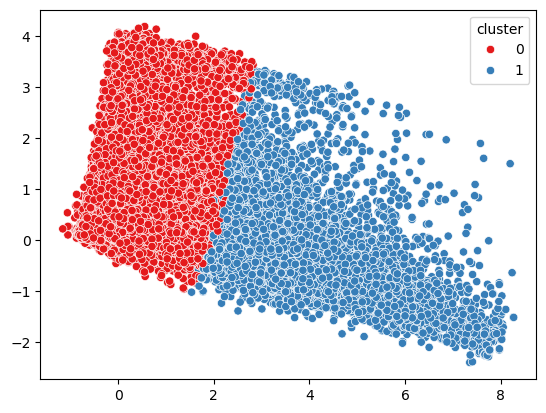

In [33]:
# Menampilkan grafik plotting cluster pada 2D dengan pemodelan
svd_2d = TruncatedSVD(n_components=2)
svd_2d.fit(X_scaled)

sales_scaled_svd_2d = svd_2d.fit_transform(X_scaled)

sns.scatterplot(x=sales_scaled_svd_2d[:,0], y=sales_scaled_svd_2d[:,1], hue=df['cluster'], palette='Set1')

In [34]:
df.to_csv('listings_clustered.csv', index=False)